In [340]:
import pandas as pd
import numpy as np
import seaborn as sns


In [341]:
data = pd.read_csv("cirrhosis.csv")
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [343]:
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [344]:
cat_features = []
lis = list(data.columns)
for i in lis:
    if data[i].dtype == "object":
        cat_features.append(i)
cat_features

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [345]:
for i in cat_features:
    print(data[i].unique())

['D' 'C' 'CL']
['D-penicillamine' 'Placebo' nan]
['F' 'M']
['Y' 'N' nan]
['Y' 'N' nan]
['Y' 'N' nan]
['Y' 'N' 'S']


In [346]:
data["Drug"].values

array(['D-penicillamine', 'D-penicillamine', 'D-penicillamine',
       'D-penicillamine', 'Placebo', 'Placebo', 'Placebo', 'Placebo',
       'D-penicillamine', 'Placebo', 'Placebo', 'Placebo', 'Placebo',
       'Placebo', 'D-penicillamine', 'Placebo', 'Placebo',
       'D-penicillamine', 'D-penicillamine', 'Placebo', 'Placebo',
       'D-penicillamine', 'Placebo', 'D-penicillamine', 'Placebo',
       'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo',
       'Placebo', 'Placebo', 'D-penicillamine', 'Placebo', 'Placebo',
       'D-penicillamine', 'Placebo', 'D-penicillamine', 'D-penicillamine',
       'D-penicillamine', 'Placebo', 'D-penicillamine', 'Placebo',
       'Placebo', 'D-penicillamine', 'Placebo', 'Placebo', 'Placebo',
       'D-penicillamine', 'Placebo', 'D-penicillamine', 'D-penicillamine',
       'D-penicillamine', 'D-penicillamine', 'Placebo', 'D-penicillamine',
       'D-penicillamine', 'D-penicillamine', 'D-penicillamine', 'Placebo',
       'Placebo', 'Plac

c:\Users\yash0\Desktop\Python\Machine Learning\Projects\Medical\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stage', ylabel='count'>

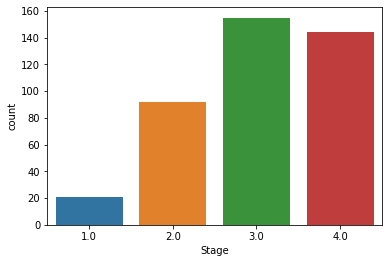

In [347]:
sns.countplot(data["Stage"])

In [348]:
data = data.dropna(subset=['Drug'])

In [349]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [350]:
data.isnull().sum()


ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [351]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [352]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy="mean")
si1 = SimpleImputer(missing_values=np.nan,strategy="mean")
si.fit(data.iloc[:,10:-1])

data.iloc[:,10:-1] = si.transform(data.iloc[:,10:-1])

In [353]:
data.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [354]:
lii = list(data["Status"])
lii

['D',
 'C',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'D',
 'CL',
 'D',
 'D',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'C',
 'C',
 'D',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'D',
 'C',
 'C',
 'D',
 'C',
 'D',
 'C',
 'D',
 'C',
 'CL',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'C'

In [355]:
status = []
for i in range(len(lii)):
    if lii[i]=="D":
        status.append(0)
    elif lii[i]=="C":
        status.append(1)
    else :
        status.append(2)
status

[0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 1,


In [356]:
data["status"] = status
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,...,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,...,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,2


In [357]:
data = data.drop(["Status"], axis=1)
data.head()

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
0,1,400,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0
1,2,4500,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1
2,3,1012,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0
3,4,1925,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0
4,5,1504,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,2


In [358]:
data["Age"] = (data["Age"].values/365).round()

In [359]:
l = data.drop(["ID","N_Days","Drug","Age","Sex","Ascites","Hepatomegaly","Spiders","Edema","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","status"], axis=1)
l

,Stage
0,4.0
1,3.0
2,4.0
3,4.0
4,3.0
...,...
307,2.0
308,2.0
309,2.0
310,2.0


In [360]:
data = data.drop(["Stage"], axis=1)

In [361]:
X = data.iloc[:, 1:].values
y = l

In [362]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 3, 4, 5, 6, 7])], remainder="passthrough" )
X = np.array(ct.fit_transform(X))
print(ct.get_feature_names())

['encoder__x0_D-penicillamine', 'encoder__x0_Placebo', 'encoder__x1_F', 'encoder__x1_M', 'encoder__x2_N', 'encoder__x2_Y', 'encoder__x3_N', 'encoder__x3_Y', 'encoder__x4_N', 'encoder__x4_Y', 'encoder__x5_N', 'encoder__x5_S', 'encoder__x5_Y', 'x0', 'x2', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17']


c:\Users\yash0\Desktop\Python\Machine Learning\Projects\Medical\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [363]:
print(X[:5, :28])

[[1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 400 59.0 14.5 261.0
  2.6 156.0 1718.0 137.95 172.0 190.0 12.2 0]
 [1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 4500 56.0 1.1 302.0
  4.14 54.0 7394.8 113.52 88.0 221.0 10.6 1]
 [1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1012 70.0 1.4 176.0
  3.48 210.0 516.0 96.1 55.0 151.0 12.0 0]
 [1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1925 55.0 1.8 244.0
  2.54 64.0 6121.8 60.63 92.0 183.0 10.3 0]
 [0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 1504 38.0 3.4 279.0
  3.53 143.0 671.0 113.15 72.0 136.0 10.9 2]]


In [364]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [365]:
y_test

,Stage
173,1.0
276,3.0
7,3.0
84,4.0
166,4.0
...,...
278,2.0
178,4.0
67,3.0
164,4.0


In [366]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
gb = GradientBoostingClassifier(n_estimators = 200, max_depth = 1)
gb.fit(X_train, y_train.values.ravel())
y_predgb = gb.predict(X_test) 

In [367]:
gbmean = cross_val_score(estimator=gb, X=X_train, y=y_train.values.ravel(), cv =10)
print(mean_absolute_error(y_test, y_predgb))
print(gbmean.mean())

0.6349206349206349
0.5101666666666668


In [368]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predgb)
cm

array([[ 0,  1,  3,  0],
       [ 1,  4,  9,  4],
       [ 0,  1, 13,  2],
       [ 0,  1, 10, 14]], dtype=int64)

In [369]:
import pickle
file = open('cirrhosis.pkl', 'wb')
pickle.dump(gb, file)
file.close()